In [3]:
%config IPCompleter.greedy=True

import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

16000
6030
(6030,)
(16000,)
5884
(10116,)
16146
73
73
(16000,)


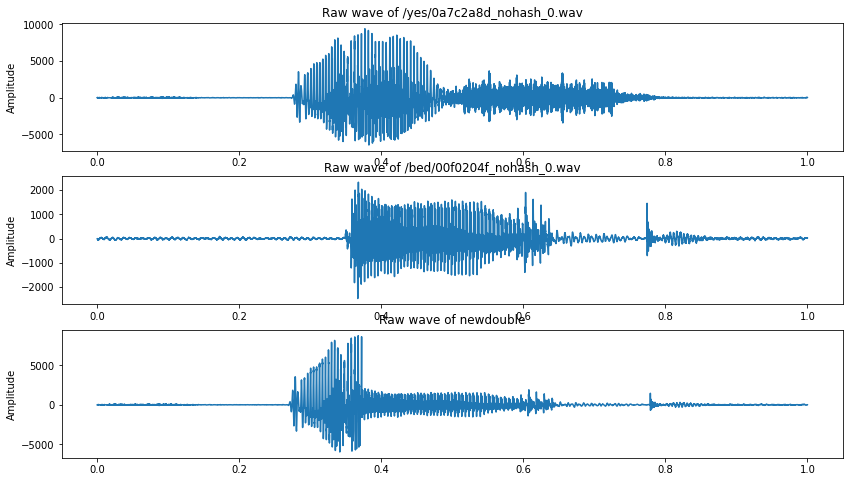

In [4]:
train_audio_path = 'data/train/audio'
test_audio_path = 'data/test/audio'
filename = '/yes/0a7c2a8d_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

samplesLength = np.shape(samples)
print(samplesLength[0])
maxIndexArray = np.where(samples == samples.max())
maxIndex = maxIndexArray[0][0]
print(maxIndex)
samplesFirstHalf = samples[0:maxIndex]
print(np.shape(samplesFirstHalf))
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

filename = '/bed/00f0204f_nohash_0.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

print(np.shape(samples))
maxIndexArray = np.where(samples == samples.max())
maxIndex = maxIndexArray[0][0]
print(maxIndex)
samplesSecondHalf = samples[maxIndex:]
print(np.shape(samplesSecondHalf))
ax2 = fig.add_subplot(312)
ax2.set_title('Raw wave of ' + filename)
ax2.set_ylabel('Amplitude')
ax2.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

joinedSamples = np.concatenate((samplesFirstHalf, samplesSecondHalf), axis=0)
joinedSamplesLen = np.shape(joinedSamples)
print(joinedSamplesLen[0])
deltaLength = joinedSamplesLen[0] - samplesLength[0]
trimValue = int((deltaLength)/2)
print(trimValue)
backTrim = deltaLength - trimValue
print(backTrim)
trimmedJoinedSamples = joinedSamples[trimValue:-backTrim]
print(np.shape(trimmedJoinedSamples))
ax3 = fig.add_subplot(313)
ax3.set_title('Raw wave of ' + "newdouble")
ax3.set_ylabel('Amplitude')
ax3.plot(np.linspace(0, sample_rate/len(trimmedJoinedSamples), sample_rate), trimmedJoinedSamples)

ipd.Audio(trimmedJoinedSamples, rate=sample_rate)

In [5]:
def getDoubleWord(source1, source2, destPath):
    sample_rate, samples = wavfile.read(source1)

    filename = "yes"
    samplesLength = np.shape(samples)
    print("firstsampleslen : "+str(samplesLength[0]))
    maxIndexArray = np.where(samples == samples.max())
    maxIndex = maxIndexArray[0][0]
    samplesFirstHalf = samples[0:maxIndex]
#     print("FirstHalf : " + str(np.shape(samplesFirstHalf)))
#     fig = plt.figure(figsize=(14, 8))
#     ax1 = fig.add_subplot(311)
#     ax1.set_title('Raw wave of ' + filename)
#     ax1.set_ylabel('Amplitude')
#     ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

    filename = '/bed/00f0204f_nohash_0.wav'
    sample_rate, samples = wavfile.read(source2)

    filename = "bed"
    maxIndexArray = np.where(samples == samples.max())
    maxIndex = maxIndexArray[0][0]
    samplesSecondHalf = samples[maxIndex:]
#     print("SecondHalf : " + str(np.shape(samplesSecondHalf)))
#     ax2 = fig.add_subplot(312)
#     ax2.set_title('Raw wave of ' + filename)
#     ax2.set_ylabel('Amplitude')
#     ax2.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

    joinedSamples = np.concatenate((samplesFirstHalf, samplesSecondHalf), axis=0)
    joinedSamplesLen = np.shape(joinedSamples)
#     print("joineSamplesLen : " + str(joinedSamplesLen[0]))
    deltaLength = joinedSamplesLen[0] - samplesLength[0]
    if(deltaLength>0):
        trimValue = int((deltaLength)/2)
        backTrim = deltaLength - trimValue
        trimmedJoinedSamples = joinedSamples[trimValue:-backTrim]
    elif(deltaLength<0):
        zeroList = []
        delta = 16000-joinedSamplesLen[0]
        padd = int(delta/2)
        zeroList = [0]*padd
        trimmedJoinedSamples = np.concatenate([np.array(zeroList),joinedSamples,np.array(zeroList)])
    else:
        trimmedJoinedSamples = joinedSamples
#     print(np.shape(trimmedJoinedSamples))
#     ax3 = fig.add_subplot(313)
#     ax3.set_title('Raw wave of ' + "newdouble")
#     ax3.set_ylabel('Amplitude')
#     ax3.plot(np.linspace(0, sample_rate/len(trimmedJoinedSamples), sample_rate), trimmedJoinedSamples)
    wavfile.write(destPath,sample_rate,trimmedJoinedSamples)
    
getDoubleWord('data/train/audio/yes/0a7c2a8d_nohash_0.wav', 'data/train/audio/bed/00f0204f_nohash_0.wav', 'data/train/audio/doubleWords/dbword.wav')

    

firstsampleslen : 16000


In [1]:
dirs = [f for f in os.listdir(train_audio_path) if isdir(join(train_audio_path, f))]
dirs.sort()
dirs.remove('_background_noise_')
dirs.remove('doubleWords')
print(dirs)

dirs2 = dirs.copy()
print(dirs2)

doubleWavCount = 1
for direct in dirs:
    for direct2 in dirs2:
        if direct!=direct2:
            print(direct,direct2)
            waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
            waves2 = [f for f in os.listdir(join(train_audio_path, direct2)) if f.endswith('.wav')]
            for i in range(10):
                try:
                    getDoubleWord('data/train/audio/'+direct+'/'+waves[i], 'data/train/audio/'+direct2+'/'+waves2[i], 'data/train/audio/doubleWords/dbword'+str(doubleWavCount)+'.wav')
                except ValueError:
                    continue
                doubleWavCount+=1

NameError: name 'os' is not defined

In [10]:
waves = [f for f in os.listdir(join(train_audio_path, '_background_noise_')) if f.endswith('.wav')]
for wave in waves:
    source = 'data/train/audio/_background_noise_/'+wave
    sample_rate, samples = wavfile.read(source)
    splitwaves = int(len(samples)/16000)
    print(splitwaves)
    
    for i in range(splitwaves):
        trimmedSamples = samples[i*16000:(i+1)*16000]
        destPath = 'data/train/audio/_background_noise_/trimmedwaves/'+wave.strip('.wav')+str(i)+'.wav'
        wavfile.write(destPath,sample_rate,trimmedSamples)

C:\Anaconda3\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning:

Chunk (non-data) not understood, skipping it.



95
61
61
60
61
60


In [ ]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [ ]:
freqs, times, spectrogram = log_specgram(samples, sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')


In [ ]:
# Calculate
dirs = [f for f in os.listdir(train_audio_path) if isdir(join(train_audio_path, f))]
dirs.sort()
dirs.remove('_background_noise_')
print(dirs)
print(len(dirs))
number_of_recordings = []
for direct in dirs:
    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    number_of_recordings.append(len(waves))

print(number_of_recordings)
# Plot
data = [go.Histogram(x=dirs, y=number_of_recordings)]
trace = go.Bar(
    x=dirs,
    y=number_of_recordings,
    marker=dict(color = number_of_recordings, colorscale='Viridius', showscale=True
    ),
)
layout = go.Layout(
    title='Number of recordings in given label',
    xaxis = dict(title='Words'),
    yaxis = dict(title='Number of recordings')
)
py.iplot(go.Figure(data=[trace], layout=layout))


Dataset is balanced except of background_noise, but that's the different thing.

## 2.2. Deeper into recordings
<a id="deeper"></a> 

There's a very important fact. Recordings come from very different sources. As far as I can tell, some of them can come from mobile GSM channel.

Nevertheless,** it is extremely important to split the dataset in a way that one speaker doesn't occur in both train and test sets.**
Just take a look and listen to this two examlpes:

In [ ]:
filenames = ['/on/004ae714_nohash_0.wav', '/on/0137b3f4_nohash_0.wav']
for filename in filenames:
    sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
    xf, vals = custom_fft(samples, sample_rate)
    plt.figure(figsize=(12, 4))
    plt.title('FFT of speaker ' + filename[4:11])
    plt.plot(xf, vals)
    plt.xlabel('Frequency')
    plt.grid()
    plt.show()

Even better to listen:

In [ ]:
print('Speaker ' + filenames[0][4:11])
ipd.Audio(train_audio_path+filenames[0])

In [ ]:
print('Speaker ' + filenames[1][4:11])
ipd.Audio(train_audio_path+filenames[1])

There are also recordings with some weird silence (some compression?):


In [ ]:
filename = '/yes/01bb6a2a_nohash_1.wav'
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)
freqs, times, spectrogram = log_specgram(samples, sample_rate)

plt.figure(figsize=(10, 7))
plt.title('Spectrogram of ' + filename)
plt.ylabel('Freqs')
plt.xlabel('Time')
plt.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
plt.yticks(freqs[::16])
plt.xticks(times[::16])
plt.show()

It means, that we have to prevent overfitting to the very specific acoustical environments.


## 2.3. Recordings length
<a id="len"></a> 

Find if all the files have 1 second duration:

In [ ]:
num_of_shorter = 0
for direct in dirs:
    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + direct + '/' + wav)
        if samples.shape[0] < sample_rate:
            num_of_shorter += 1
print('Number of recordings shorter than 1 second: ' + str(num_of_shorter))

That's suprising, and there is a lot of them. We can pad them with zeros.

## 2.4. Mean spectrograms and FFT
<a id="meanspectrogramsandfft"></a> 

Let's plot mean FFT for every word

In [ ]:
to_keep = 'yes no up down left right on off stop go'.split()
dirs = [d for d in dirs if d in to_keep]

print(dirs)

for direct in dirs:
    vals_all = []
    spec_all = []

    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + direct + '/' + wav)
        if samples.shape[0] != 16000:
            continue
        xf, vals = custom_fft(samples, 16000)
        vals_all.append(vals)
        freqs, times, spec = log_specgram(samples, 16000)
        spec_all.append(spec)

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.title('Mean fft of ' + direct)
    plt.plot(np.mean(np.array(vals_all), axis=0))
    plt.grid()
    plt.subplot(122)
    plt.title('Mean specgram of ' + direct)
    plt.imshow(np.mean(np.array(spec_all), axis=0).T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    plt.yticks(freqs[::16])
    plt.xticks(times[::16])
    plt.show()

## 2.5. Gaussian Mixtures modeling
<a id="gmms"></a> 

We can see that mean FFT looks different for every word. We could model each FFT with a mixture of Gaussian distributions. Some of them however, look almost identical on FFT, like *stop* and *up*... But wait, they are still distinguishable when we look at spectrograms! High frequencies are earlier than low at the beginning of *stop* (probably *s*).

That's why temporal component is also necessary. There is a [Kaldi](http://kaldi-asr.org/) library, that can model words (or smaller parts of words) with GMMs and model temporal dependencies with [Hidden Markov Models](https://github.com/danijel3/ASRDemos/blob/master/notebooks/HMM_FST.ipynb).

We could use simple GMMs for words to check what can we model and how hard it is to distinguish the words. We can use [Scikit-learn](http://scikit-learn.org/) for that, however it is not straightforward and lasts very long here, so I abandon this idea for now.

## 2.6. Frequency components across the words
<a id="components"></a> 


In [ ]:
def violinplot_frequency(dirs, freq_ind):
    """ Plot violinplots for given words (waves in dirs) and frequency freq_ind
    from all frequencies freqs."""

    spec_all = []  # Contain spectrograms
    ind = 0
    for direct in dirs:
        spec_all.append([])

        waves = [f for f in os.listdir(join(train_audio_path, direct)) if
                 f.endswith('.wav')]
        for wav in waves[:100]:
            sample_rate, samples = wavfile.read(
                train_audio_path + '/' + direct + '/' + wav)
            freqs, times, spec = log_specgram(samples, sample_rate)
            spec_all[ind].extend(spec[:, freq_ind])
        ind += 1

    # Different lengths = different num of frames. Make number equal
    minimum = min([len(spec) for spec in spec_all])
    spec_all = np.array([spec[:minimum] for spec in spec_all])

    plt.figure(figsize=(13,7))
    plt.title('Frequency ' + str(freqs[freq_ind]) + ' Hz')
    plt.ylabel('Amount of frequency in a word')
    plt.xlabel('Words')
    sns.violinplot(data=pd.DataFrame(spec_all.T, columns=dirs))
    plt.show()

In [ ]:
violinplot_frequency(dirs, 20)

In [ ]:
violinplot_frequency(dirs, 50)

In [ ]:
violinplot_frequency(dirs, 120)

## 2.7. Anomaly detection
<a id="anomaly"></a> 

We should check if there are any recordings that somehow stand out from the rest. We can lower the dimensionality of the dataset and interactively check for any anomaly.
We'll use PCA for dimensionality reduction:

In [ ]:
fft_all = []
names = []
for direct in dirs:
    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + '/' + direct + '/' + wav)
        if samples.shape[0] != sample_rate:
            samples = np.append(samples, np.zeros((sample_rate - samples.shape[0], )))
        x, val = custom_fft(samples, sample_rate)
        fft_all.append(val)
        names.append(direct + '/' + wav)

print(np.shape(val))
fft_all = np.array(fft_all)
print(np.shape(fft_all))

# Normalization
fft_all = (fft_all - np.mean(fft_all, axis=0)) / np.std(fft_all, axis=0)

# Dim reduction
pca = PCA(n_components=3)
fft_all = pca.fit_transform(fft_all)
print(np.shape(fft_all))

def interactive_3d_plot(data, names):
    scatt = go.Scatter3d(x=data[:, 0], y=data[:, 1], z=data[:, 2], mode='markers', text=names)
    data = go.Data([scatt])
    layout = go.Layout(title="Anomaly detection")
    figure = go.Figure(data=data, layout=layout)
    py.iplot(figure)
    
interactive_3d_plot(fft_all, names)

Notice that there are *yes/e4b02540_nohash_0.wav*, *go/0487ba9b_nohash_0.wav* and more points, that lie far away from the rest. Let's listen to them.

In [ ]:
print('Recording go/0487ba9b_nohash_0.wav')
ipd.Audio(join(train_audio_path, 'go/0487ba9b_nohash_0.wav'))

In [ ]:
print('Recording yes/e4b02540_nohash_0.wav')
ipd.Audio(join(train_audio_path, 'yes/e4b02540_nohash_0.wav'))

If you will look for anomalies for individual words, you can find for example this file for *seven*:

In [ ]:
print('Recording seven/e4b02540_nohash_0.wav')
ipd.Audio(join(train_audio_path, 'seven/b1114e4f_nohash_0.wav'))

That's nothing obviously important. Usually you can find some distortions using this method. Data seems to contain what it should.

## 3. Where to look for the inspiration
<a id="wheretostart"></a> 

You can take many different approches for the competition. I can't really advice any of that. I'd like to share my initial thoughts.

There is a trend in recent years to propose solutions based on neural networks. Usually there are two architectures. My ideas are here.

1. Encoder-decoder: https://arxiv.org/abs/1508.01211
2. RNNs with CTC loss: https://arxiv.org/abs/1412.5567<br>
For me, 1 and 2  are a sensible choice for this competition, especially if you do not have background in SR field. They try to be end-to-end solutions. Speech recognition is a really big topic and it would be hard to get to know important things in short time.

3. Classic speech recognition is described here: http://www.ece.ucsb.edu/Faculty/Rabiner/ece259/Reprints/tutorial%20on%20hmm%20and%20applications.pdf

You can find *Kaldi* [Tutorial for dummies](http://kaldi-asr.org/doc/kaldi_for_dummies.html), with a problem similar to this competition in some way.

4. Very deep CNN - Don't know if it is used for SR. However, most papers concern Large Vocabulary Continuous Speech Recognition Systems (LVCSR). We got different task here - a very small vocabulary, and recordings with only one word in it, with a (mostly) given length. I suppose such approach can win the competition. 
